In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
LearningSet = pd.read_csv('./datasets/IBU_Dataset.csv')

LearningSet=LearningSet.sample(frac = 1)

In [3]:
TrainSet =  LearningSet.iloc[:15,:] #.iloc is used to slice data frames using positional indices

TestSet = LearningSet.iloc[15:,:]

In [4]:
Xtrain = TrainSet.drop(['IBU'],axis=1) #But label

Xtest = TestSet.drop(['IBU'],axis=1)  #All but label

In [5]:
ytrain = TrainSet.IBU #This contains the ground truth label, or output

ytest = TestSet.IBU

In [6]:
model = LinearRegression()
model.fit(Xtrain, ytrain)

LinearRegression()

In [7]:
y_predict = model.predict(Xtest)
y_predict


array([24.42656457, 28.23745677, -9.64500855, 30.15639018, 32.85791455])

In [8]:
ytest

12    55
13    55
19    50
18     2
6     30
Name: IBU, dtype: int64

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

score= model.score(Xtest, ytest)
print('SCORE: ', score)

mse = mean_squared_error(ytest, y_predict)
print('MSE:',mse)

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(ytest, y_predict, squared=False)
print('RMSE:',rmse)

# Mean Absolute Error (MAE) for California Housing Dataset
mae = mean_absolute_error(ytest, y_predict)
print('MAE:',mae)

print(model.intercept_)
#print(model.coef_)

SCORE:  -1.8874907280041255
MSE: 1201.889140624437
RMSE: 34.66827282436258
MAE: 29.5990583887668
4.486320775960216


C:\Users\mrugh\Desktop\pivo\venv\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


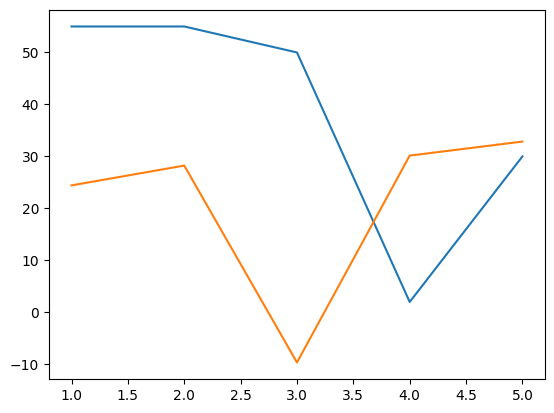

In [10]:
y_predict
ytest
plt.plot([1,2,3,4,5], ytest)
plt.plot([1,2,3,4,5], y_predict)

In [11]:
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.model_selection import KFold, StratifiedKFold

In [12]:
# This is the standard version. Important: it doesn't shuffle the data,
# so if your positive examples are all at the beginning or all the end, it might lead to disastrous results.

cv1 = KFold(n_splits = 5)

#This is v2: shuffling added (recommended!)

cv2 = KFold(shuffle = True, n_splits = 5, random_state=5)

# STRATIFICATION ensures that the class distributions in each split resembles those of the
# entire data set

cv3 = StratifiedKFold(shuffle = True, n_splits = 5, random_state=5)


In [13]:
final_features=LearningSet.drop(['IBU'],axis=1) #But label
targets=LearningSet.IBU

scores2 = cross_validate(model, final_features, targets, cv = cv2)

#scores3 = cross_validate(model, final_features, targets, cv = cv3)


In [14]:
scores2

{'fit_time': array([0.00899839, 0.00900054, 0.00900126, 0.00800157, 0.00900078]),
 'score_time': array([0.00799966, 0.00799942, 0.00699854, 0.00799847, 0.00699925]),
 'test_score': array([-5.57563186, -0.23114221, -1.28511222, -0.57306934, -2.6787759 ])}

In [15]:
>:(

SyntaxError: invalid syntax (1931737921.py, line 1)